# Zadanie 1
Wygeneruj dane 2d oraz 3d w kształcie prostokąta (odpowiednio sześcianu). Wykonaj PCA i narysuj wszystkie (odpowiednio dwa i trzy) komponenty.

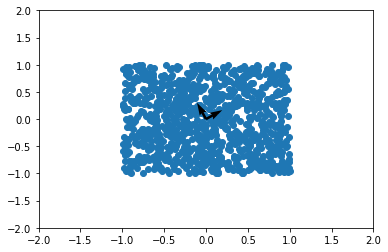

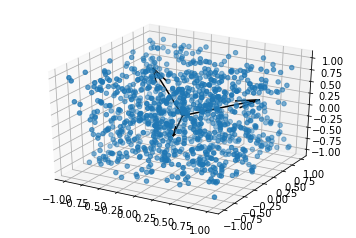

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

data = np.column_stack((np.random.uniform(-1, 1, 1000), np.random.uniform(-1, 1, 1000)))
pca = PCA(n_components=2)
pca.fit(data)

origin = [0], [0]
plt.scatter(data[:,0], data[:,1])
plt.quiver(*origin,pca.components_[:,0],pca.components_[:,1])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

data = np.column_stack((np.random.uniform(-1, 1, 1000), np.random.uniform(-1, 1, 1000), np.random.uniform(-1, 1, 1000)))
pca = PCA(n_components=3)
pca.fit(data)
origin = [0], [0], [0]
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
ha.scatter(data[:,0], data[:,1], data[:,2])
ha.quiver(*origin,pca.components_[:,0],pca.components_[:,1],pca.components_[:,2], color='black')
plt.show()


# Zadanie 2
Dla danych 3d z powyższego zadania zredukuj wymiar do 2d.

Narysuj dane

  * w 2d po redukcji
  * w 3d po redukcji (dane na płaszczyźnie w 3d)


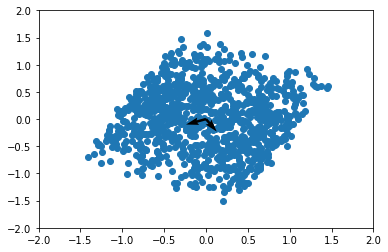

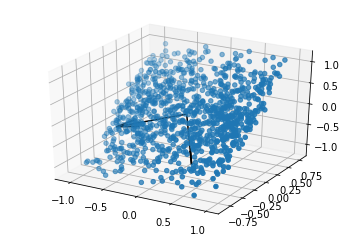

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

data = np.column_stack((np.random.uniform(-1, 1, 1000), np.random.uniform(-1, 1, 1000), np.random.uniform(-1, 1, 1000)))
pca = PCA(n_components=2)
pca.fit(data)

origin = [0], [0]
transformed = pca.transform(data)
plt.scatter(transformed[:,0], transformed[:,1])
plt.quiver(*origin,pca.components_[:,0],pca.components_[:,1])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()


data = np.dot(transformed,pca.components_)
origin = [0], [0], [0]
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
ha.scatter(data[:,0], data[:,1], data[:,2])
ha.quiver(*origin,pca.components_[:,0],pca.components_[:,1],pca.components_[:,2], color='black')
plt.show()

# Zadanie 3
Pobierz dowolne dane (wymiaru więcej niż 5) z repozytorium UCI oraz wizualizuj je za pomocą PCA.
Czyli zredukuj wymiar do 2d i narysuj.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


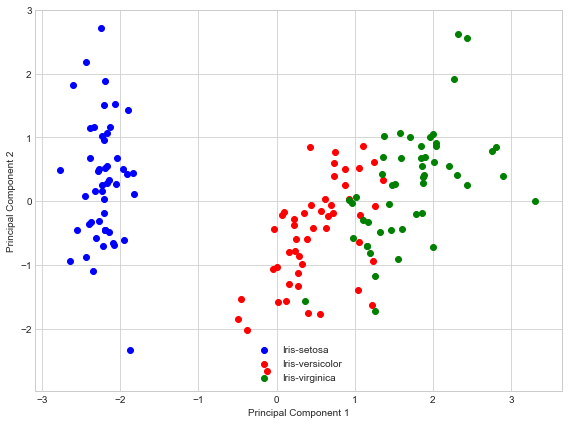

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) 

df.tail()

X = df.ix[:,0:4].values
y = df.ix[:,4].values
X_std = StandardScaler().fit_transform(X)

sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.savefig('PREDI3.png', format='png', dpi=1200)
    plt.show()

# Zadanie 4

Zad 4.
Ściągnij bazę twarzy handwritten digits wykonaj algorytm PCA (5 wymiarów).

```python
	from sklearn.datasets import load_digits
	digits = load_digits()
	print digits.keys()
```

Wykonaj grupowanie danych metodą k-means (k=9) na danych pełnego wymiaru oraz danych po algorytmie PCA wymiarach. Porównaj wyniki za pomocą miary Adjusted Rand index
http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation.


In [21]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA

digits = load_digits()
y = digits.target

kmeans = KMeans(n_clusters=9)
kmeans.fit(digits.data)
print(metrics.adjusted_rand_score(y, kmeans.labels_))

digits = load_digits()
pca = PCA(n_components=5)
pca.fit(digits.data)
transformed = pca.transform(digits.data)

kmeans = KMeans(n_clusters=9)
kmeans.fit(transformed)
print(metrics.adjusted_rand_score(y, kmeans.labels_))

0.594797549915
0.53880410451


# Zadanie 5

Zaimplementuj PCA samodzielnie i zaprezentuj jak działa na danych z iris.